fase de clasificacion supervisada: preparar cuadernillos con los experimentos, explicar modelos utilizados (reg log, random forest ... cnn), comparar rendimiendo y buscar formas para mejorar

Una vez obtenido un dataset con suficientes noticias de cada categoria objetivo, procedimos a realizar los primeros entrenamientos de distintos modelos de clasificacion supervisada, contemplando tambien una fase de preprocesamiento de la entrada para mejorar en algunos aspectos y simplificar otros...

# Preprocesamiento

## Titulo y cuerpo de la noticia

Como se comento en pasos anteriores, el titulo de una noticia es de gran importancia ya que concentra una gran cantidad de informacion, por lo que es una buena idea incluirlo dentro de los datos con los que se entrenaran nuestros modelos. El dataset contiene una columna 'content' en el que se encuentra el titulo de la noticia mas el cuerpo 

...

In [2]:
import pandas as pd
from pandasql import sqldf
from os.path import join

In [3]:
ds_names = ['dataset_paso_3.csv',  # original
            'dataset_paso3d5.csv', # + cultura y planeta
            'dataset_paso3d8.csv', # + cultura 
            'dataset_paso3d9.csv', # + planeta (sin mucho cambio)
            'dataset_paso3d96.csv'] # + cultura, planeta y catastrofes
MAX_LEN = 1400
RANDOM_STATE = 8008
folder = './datasets'
df = pd.read_csv(join(folder, ds_names[-1]))
#df = pd.read_csv('dataset_paso_3.csv')
pd.set_option('display.max_colwidth', 200)
df[['title', 'content']].head()

,title,content
0,"Vacunación en Chile empezaría primer trimestre del 2021 e incluiría a 15,2 millones de personas","Vacunación en Chile empezaría primer trimestre del 2021 e incluiría a 15,2 millones de personas. Este martes, el Presidente Sebastián Piñera anunció que el plan de vacunación para combatir el cor..."
1,"Sernapesca: ""Viabilidad del virus de infectar es muy baja"" tras hallazgo de COVID-19 en paquete chileno en China","Sernapesca: ""Viabilidad del virus de infectar es muy baja"" tras hallazgo de COVID-19 en paquete chileno en China. La aduana china detectó la presencia del virus COVID-19 en la superficie de una ca..."
2,"Presidente de México asegura que la pandemia ""no nos ha rebasado""","Presidente de México asegura que la pandemia ""no nos ha rebasado"". El presidente de México, Andrés Manuel López Obrador, afirmó que su gobierno ha logrado controlar la pandemia del nuevo coronavir..."
3,Gobierno de Uruguay endurece medidas por aumento sostenido de casos de covid-19,"Gobierno de Uruguay endurece medidas por aumento sostenido de casos de covid-19. El presidente de Uruguay, Luis Lacalle Pou, anunció este martes nuevas medidas para contener el avance de la pandem..."
4,Presidente boliviano destituye a ministro que contrató a su expareja,"Presidente boliviano destituye a ministro que contrató a su expareja. El presidente boliviano, Luis Arce, destituyó este martes a un ministro que contrató como su brazo derecho a una expareja, a q..."


In [4]:
_df = df.groupby(['category']).size().sort_values()
_df

category
5-Catástrofes_y_Accidentes     1430
8-Ecología_y_Planeta           1452
6-Cultura_y_Artes              1678
2-Economía                     2635
10-Salud                       2683
4-Ciencias_y_Tecnología        4772
7-Deporte                      6702
9-Crimen_delitos_y_Justicia    8212
1-Mundo                        8586
3-Política_y_Conflictos        8951
dtype: int64

In [5]:
SAMPLE_SIZE = _df[0]
SAMPLE_SIZE

1430

# balancear el dataset alan tigua?
## Exportar dataset balanceado para el siguiente paso

In [6]:
FORCE_BALANCE = True
if FORCE_BALANCE:
    new_df = df.groupby('category').sample(n=SAMPLE_SIZE, random_state=RANDOM_STATE)
    new_df.reset_index(drop=True, inplace=True)
    outname = join(folder, f'ds_balanced_{SAMPLE_SIZE}_rs{RANDOM_STATE}.csv')
    new_df.to_csv(outname, index=False)
    print(outname)
else:
    new_df = df
new_df.head(5)

./datasets/ds_balanced_1430_rs8008.csv


,id,title,content,category,url,text,index
0,14804921,Gobierno peruano presenta recurso para suspender juicio político al Presidente Vizcarra,Gobierno peruano presenta recurso para suspender juicio político al Presidente Vizcarra. El Gobierno peruano presentó el lunes una demanda para que el Tribunal Constitucional defina si el Congre...,1-Mundo,NaN,NaN,NaN
1,614295,Estados Unidos supera una vez más el récord de casos nuevos diarios de covid-19,"Estados Unidos supera una vez más el récord de casos nuevos diarios de covid-19. Estados Unidos registró el jueves más de 210.000 casos nuevos de coronavirus en un día, la cifra más alta desde el ...",1-Mundo,NaN,NaN,NaN
2,14802746,Perú reanudará en octubre vuelos con Chile y otros cinco países tras presentar mejora en el coronavirus,"Perú reanudará en octubre vuelos con Chile y otros cinco países tras presentar mejora en el coronavirus. Perú reanudará los vuelos internacionales con seis países a partir del 5 de octubre, los qu...",1-Mundo,NaN,NaN,NaN
3,5688988,Exprimer ministro italiano Berlusconi hospitalizado por problemas cardíacos,"Exprimer ministro italiano Berlusconi hospitalizado por problemas cardíacos. El exprimer ministro italiano Silvio Berlusconi fue ingresado en un hospital de Mónaco tras sufrir problemas cardíacos,...",1-Mundo,NaN,NaN,NaN
4,617306,"""Embarazoso"": Biden arremete contra Trump por no reconocer derrota en recientes elecciones","""Embarazoso"": Biden arremete contra Trump por no reconocer derrota en recientes elecciones. El presidente electo de Estados Unidos, Joe Biden, dijo el martes que la negativa del mandatario Donald ...",1-Mundo,NaN,NaN,NaN


In [7]:
new_df.groupby(['category']).size().sort_values()

category
1-Mundo                        1430
10-Salud                       1430
2-Economía                     1430
3-Política_y_Conflictos        1430
4-Ciencias_y_Tecnología        1430
5-Catástrofes_y_Accidentes     1430
6-Cultura_y_Artes              1430
7-Deporte                      1430
8-Ecología_y_Planeta           1430
9-Crimen_delitos_y_Justicia    1430
dtype: int64

## Truncar contenido


habria que probar si esto mejora los pasos anteriores (lda) xd

In [9]:
lol = df.content.map(len).idxmax()
print("len: ", len(df.iloc[lol].content), "\n", df.iloc[lol].content[:2000], "...") # ?????

len:  35543 
 Chile: El plebiscito amenazado.  “Los guerreros victoriosos ganan primero y luego van a la guerra, mientras que los guerreros derrotados van a la guerra primero y luego buscan ganar” Sun Tzu 1.-Resumen Ante el próximo plebiscito por una nueva constitución, se analiza y evalúa la actual ofensiva de parte de la derecha para su neutralización. Se busca evitar la opción de Piñera de no realizar el plebiscito, haciendo del apruebo un consenso de gobierno y oposición, generando una situación en que todos estamos por el apruebo, evitando así el triunfo del progresismo y la ciudadanía. Por Alejandro Navarro Brain 2.- Escenarios de la votación para el 25 de octubre 2.1.- Alta participación y alta diferencia de votos 2.2.- Alta participación y baja diferencia de votos 2.3.- Baja participación y alta diferencia de votos 2.4.- Baja participación y baja diferencia de votos. 3.- Estrategias de campaña de la derecha en el plebiscito 3.1.-Pandemia, miedo y abstención: Con la situación de

## Cuanto truncar??

In [10]:
new_df['content'] = new_df.content.str.slice(0, MAX_LEN)

In [11]:
print('min len: ', new_df.content.map(len).min())
print('max len: ', new_df.content.map(len).max())

min len:  147
max len:  1400


## Bag of words + tf-idf

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

## NLTK

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize.casual import casual_tokenize
from nltk.stem import SnowballStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from functools import partial

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib notebook
from functools import partial
import numpy as np

from string import punctuation
import re
from tqdm.auto import tqdm
import string
import spacy

In [12]:
#nltk.download('stopwords')
#nltk.download('punkt')

In [16]:
#stopwords
spanish_stopwords = stopwords.words('spanish')

#stemmer
stemmer = SnowballStemmer('spanish')

#puntuacion
non_words = list(punctuation)
#incluir puntuacion del español
non_words.extend(['¿', '¡'])
#numeros
non_words.extend(map(str,range(10)))

# Incluir n-grams?

In [17]:
stemmer = SnowballStemmer('spanish')

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def text_cleaner(text, stem=False):
    # puntuacion
    text = ''.join([c for c in text if c not in non_words])
    # caracteres repetidos, skippeable
    text = re.sub(r'(.)\1+', r'\1\1', text)
    # tokenize
    tokens = casual_tokenize(text, preserve_case=False)
    # quitar stopwords
    filtered_sentence = [w for w in tokens if not w in spanish_stopwords]
    # stemming
    if stem:
        filtered_sentence = stem_tokens(filtered_sentence, stemmer)
    
    return " ".join(filtered_sentence)

In [18]:
train_size = 0.70

In [19]:
train_idxs = new_df.groupby('category').sample(frac=train_size, random_state=RANDOM_STATE).index
train_df = new_df.iloc[train_idxs]
q="""SELECT category, count(*) FROM train_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,9-Crimen_delitos_y_Justicia,1001
1,8-Ecología_y_Planeta,1001
2,7-Deporte,1001
3,6-Cultura_y_Artes,1001
4,5-Catástrofes_y_Accidentes,1001
5,4-Ciencias_y_Tecnología,1001
6,3-Política_y_Conflictos,1001
7,2-Economía,1001
8,10-Salud,1001
9,1-Mundo,1001


In [20]:
test_idxs = pd.concat([new_df, train_df]).drop_duplicates(keep=False).index
test_df = new_df.iloc[test_idxs]
q="""SELECT category, count(*) FROM test_df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,9-Crimen_delitos_y_Justicia,429
1,8-Ecología_y_Planeta,429
2,7-Deporte,429
3,6-Cultura_y_Artes,429
4,5-Catástrofes_y_Accidentes,429
5,4-Ciencias_y_Tecnología,429
6,3-Política_y_Conflictos,429
7,2-Economía,429
8,10-Salud,429
9,1-Mundo,429


In [21]:
lb = LabelEncoder()
ylabels = new_df['category']
# unique_labels = sorted(ylabels.unique(), key=lambda x : len(x.split('-')[0]))
lb.fit(ylabels.unique())
true_labels = [lb.inverse_transform([i])[0] for i in range(ylabels.nunique())]
ylabels_train_target = lb.fit_transform(ylabels[train_idxs])
ylabels_test_target = lb.fit_transform(ylabels[test_idxs])

# tendriamos que hacer zfill para que queden ordenadas (01-mundo, 02- economia)
# o quitar el numero y ya xd
for label in true_labels:
    print(f" {label:<12} :  {lb.transform([label])[0]}")

 1-Mundo      :  0
 10-Salud     :  1
 2-Economía   :  2
 3-Política_y_Conflictos :  3
 4-Ciencias_y_Tecnología :  4
 5-Catástrofes_y_Accidentes :  5
 6-Cultura_y_Artes :  6
 7-Deporte    :  7
 8-Ecología_y_Planeta :  8
 9-Crimen_delitos_y_Justicia :  9


In [22]:
from spacy.lang.es.stop_words import STOP_WORDS

nlp = spacy.load('es_core_news_md', disable=['parser','ner','textcat','...'] )
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
# nlp = spacy.load("es_core_news_md")
stop_words = STOP_WORDS

stemmer = SnowballStemmer('spanish')

# Creating our tokenizer function
def spacy_tokenizer(sentence, stem=False):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens]
    
    # Removing stop words, ver lo de puntuuacion con  token.tag_
    mytokens = [ word for word in mytokens 
                          if word not in stop_words 
                          and word not in punctuations ]
    if stem:
        mytokens = [ stemmer.stem(word) for word in mytokens ]
    # return preprocessed list of tokens
    return " ".join(mytokens)

In [23]:
contento = new_df.content[5]
print(len(contento))
contento

1400


'"Médicos por la Verdad", la red negacionista que se ha expandido por el mundo y preocupa a la comunidad científica. La pandemia ha impulsado la fundación de un conjunto de  movimientos negacionistas  integrados por profesionales sanitarios que se expande con rapidez entre continentes, con Alemania, España y Latinoamérica en uno de sus ejes más activos, conocido como  "Médicos por la Verdad" . Los representantes de esta organización en España han vuelto a adquirir notoriedad con la reciente y amplia difusión de un video que recoge algunas de las falsedades recurrentes sobre la pandemia. La producción audiovisual se titula "The Big Reset", lo que se puede traducir como  "el gran reinicio" . RelacionadaDetalle(\'1009111\'); Se refiere así a un supuesto plan internacional de los poderes políticos y económicos que utilizaría esta crisis para reinventar el mundo con la supresión de libertades y derechos. En él son entrevistados  Natalia Prego, Ángel Ruiz-Valdepeñas y María José Martínez Alb

In [24]:
#%%timeit
#text_cleaner(contento)

In [25]:
#%%timeit
# bastante mas lento que el otro, tal vez hay que deshabilitar mas cosas
#spacy_tokenizer(contento)

In [26]:
text_cleaner(contento)

'médicos verdad red negacionista expandido mundo preocupa comunidad científica pandemia impulsado fundación conjunto movimientos negacionistas integrados profesionales sanitarios expande rapidez continentes alemania españa latinoamérica ejes activos conocido médicos verdad representantes organización españa vuelto adquirir notoriedad reciente amplia difusión video recoge falsedades recurrentes pandemia producción audiovisual titula the big reset puede traducir gran reinicio relacionadadetalle refiere así supuesto plan internacional poderes políticos económicos utilizaría crisis reinventar mundo supresión libertades derechos entrevistados natalia prego ángel ruizvaldepeñas maría josé martínez albarracín caras conocidas médicos verdad españa ofrecen testimonio red redes agrupación conforma junto entidades amalgama redes estructura organizativa clara convertida maraña desinformación confluyen diferentes portavoces cada teoría propia ocasiones contradice'

In [27]:
spacy_tokenizer(contento)

"médicos red negacionista expandir mundo y preocupar a comunidad científico pandemia impulsar fundación conjunto movimiento negacionista integrado profesional sanitario expandir rapidez continente alemania españa y latinoamérica eje activo conocido médicos representante organización españa volver a adquirir notoriedad reciente y amplio difusión video recoger falsedad recurrente pandemia producción audiovisual titular the big reset traducir reinicio relacionadadetalle('1009111 referir a plan internacional político y económico utilizar crisis reinventar mundo supresión libertad y derecho entrevistar natalia prego ángel ruiz-valdepeñas y maría josé martínez albarracín cara conocido médicos españa ofrecer testimonio red red agrupación conformar a entidad amalgama red estructura organizativo convertido maraña desinformación confluir portavoz teoría ocasión contradizar"

In [28]:
%%time
# usar spacy_tokenizer aca aumenta bastante el tiempo de ejecucion
vectorizer = TfidfVectorizer(preprocessor=partial(text_cleaner, stem=False))
XD = vectorizer.fit_transform(new_df['content'])
feature_names = vectorizer.get_feature_names_out()
X_train = XD[train_idxs]
X_test = XD[test_idxs]

CPU times: user 42.7 s, sys: 94.7 ms, total: 42.8 s
Wall time: 43.3 s


In [29]:
lgr = LogisticRegression(random_state=RANDOM_STATE, multi_class='ovr', class_weight=None)
lgr.fit(X_train, ylabels_train_target)

LogisticRegression(multi_class='ovr', random_state=8008)

In [30]:
#ver efectos de los hiperparametros
rfc = RandomForestClassifier(n_estimators=100, max_depth=100,
              random_state=RANDOM_STATE, criterion='gini', class_weight=None,
              max_features='sqrt', verbose=0)
rfc.fit(X_train, ylabels_train_target)

RandomForestClassifier(max_depth=100, max_features='sqrt', random_state=8008)

In [31]:
from my_funcs import results, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
%matlplotlib notebook

In [32]:
results(ylabels_test_target, lgr, X_test, true_labels)

Resultados clasificación
LogisticRegression


                             precision    recall  f1-score   support

                    1-Mundo       0.78      0.77      0.77       429
                   10-Salud       0.78      0.79      0.78       429
                 2-Economía       0.82      0.81      0.81       429
    3-Política_y_Conflictos       0.80      0.76      0.78       429
    4-Ciencias_y_Tecnología       0.87      0.79      0.83       429
 5-Catástrofes_y_Accidentes       0.81      0.89      0.85       429
          6-Cultura_y_Artes       0.87      0.89      0.88       429
                  7-Deporte       0.97      0.96      0.96       429
       8-Ecología_y_Planeta       0.80      0.83      0.81       429
9-Crimen_delitos_y_Justicia       0.82      0.83      0.83       429

                   accuracy                           0.83      4290
                  macro avg       0.83      0.83      0.83      4290
               weighted avg       0.83      0.83      0

<IPython.core.display.Javascript object>

In [33]:
results(ylabels_test_target, rfc, X_test, true_labels)

Resultados clasificación
RandomForestClassifier


                             precision    recall  f1-score   support

                    1-Mundo       0.75      0.62      0.68       429
                   10-Salud       0.69      0.77      0.72       429
                 2-Economía       0.79      0.76      0.77       429
    3-Política_y_Conflictos       0.74      0.75      0.74       429
    4-Ciencias_y_Tecnología       0.84      0.73      0.78       429
 5-Catástrofes_y_Accidentes       0.74      0.82      0.78       429
          6-Cultura_y_Artes       0.88      0.86      0.87       429
                  7-Deporte       0.94      0.97      0.95       429
       8-Ecología_y_Planeta       0.77      0.78      0.78       429
9-Crimen_delitos_y_Justicia       0.74      0.81      0.78       429

                   accuracy                           0.79      4290
                  macro avg       0.79      0.79      0.79      4290
               weighted avg       0.79      0.79   

<IPython.core.display.Javascript object>

# comparar rendimiento usando spacy_tokenizer

In [31]:
%%time
vectorizer = TfidfVectorizer(preprocessor=partial(spacy_tokenizer, stem=False))
XD = vectorizer.fit_transform(new_df['content'])
feature_names = vectorizer.get_feature_names()
X_train = XD[train_idxs]
X_test = XD[test_idxs]

CPU times: user 7min 22s, sys: 907 ms, total: 7min 23s
Wall time: 7min 24s


/home/joselo/miniconda3/envs/tal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
%%time
lgr = LogisticRegression(random_state=42, multi_class='ovr', class_weight=None)
lgr.fit(X_train, ylabels_train_target)

CPU times: user 13.5 s, sys: 132 ms, total: 13.7 s
Wall time: 6.98 s


LogisticRegression(multi_class='ovr', random_state=42)

In [33]:
%%time
rfc = RandomForestClassifier(n_estimators=100, max_depth=100,
              random_state=42, criterion='gini', class_weight=None,
              max_features='sqrt', verbose=0)
rfc.fit(X_train, ylabels_train_target)

CPU times: user 18 s, sys: 12 ms, total: 18.1 s
Wall time: 17.9 s


RandomForestClassifier(max_depth=100, max_features='sqrt', random_state=42)

Resultados clasificación
LogisticRegression


                             precision    recall  f1-score   support

                    1-Mundo       0.78      0.76      0.77       340
                   10-Salud       0.83      0.85      0.84       340
                 2-Economía       0.83      0.86      0.85       340
    3-Política_y_Conflictos       0.82      0.75      0.78       340
    4-Ciencias_y_Tecnología       0.86      0.80      0.83       340
 5-Catástrofes_y_Accidentes       0.85      0.92      0.88       340
          6-Cultura_y_Artes       0.86      0.88      0.87       340
                  7-Deporte       0.96      0.97      0.97       340
       8-Ecología_y_Planeta       0.85      0.83      0.84       340
9-Crimen_delitos_y_Justicia       0.81      0.87      0.84       340

                   accuracy                           0.85      3400
                  macro avg       0.85      0.85      0.85      3400
               weighted avg       0.85      0.85      0

<IPython.core.display.Javascript object>


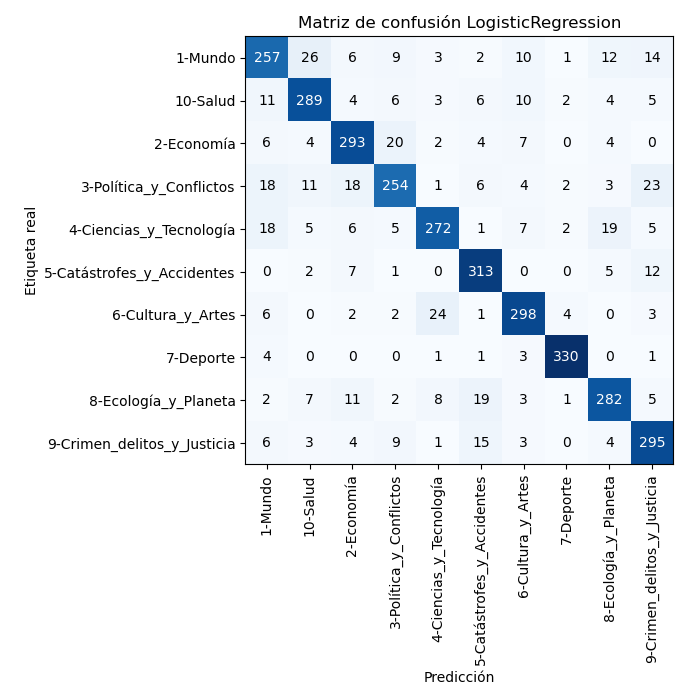

In [34]:
results(ylabels_test_target, lgr, X_test, true_labels)

# rfc anda mejor con spacy_tokenizer

Resultados clasificación
RandomForestClassifier


                             precision    recall  f1-score   support

                    1-Mundo       0.76      0.61      0.68       340
                   10-Salud       0.78      0.78      0.78       340
                 2-Economía       0.82      0.82      0.82       340
    3-Política_y_Conflictos       0.76      0.78      0.77       340
    4-Ciencias_y_Tecnología       0.88      0.76      0.82       340
 5-Catástrofes_y_Accidentes       0.75      0.90      0.82       340
          6-Cultura_y_Artes       0.84      0.88      0.86       340
                  7-Deporte       0.92      0.97      0.95       340
       8-Ecología_y_Planeta       0.83      0.76      0.79       340
9-Crimen_delitos_y_Justicia       0.77      0.85      0.81       340

                   accuracy                           0.81      3400
                  macro avg       0.81      0.81      0.81      3400
               weighted avg       0.81      0.81   

<IPython.core.display.Javascript object>


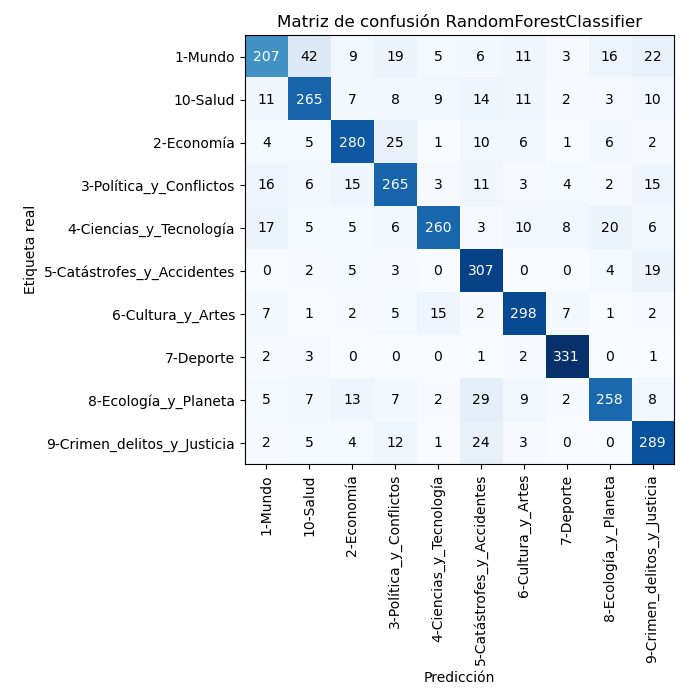

In [35]:
results(ylabels_test_target, rfc, X_test, true_labels)

# cnn

In [36]:
new_df

,id,title,content,category,url,text
0,14804921,Gobierno peruano presenta recurso para suspender juicio político al Presidente Vizcarra,Gobierno peruano presenta recurso para suspender juicio político al Presidente Vizcarra. El Gobierno peruano presentó el lunes una demanda para que el Tribunal Constitucional defina si el Congre...,1-Mundo,NaN,NaN
1,614295,Estados Unidos supera una vez más el récord de casos nuevos diarios de covid-19,"Estados Unidos supera una vez más el récord de casos nuevos diarios de covid-19. Estados Unidos registró el jueves más de 210.000 casos nuevos de coronavirus en un día, la cifra más alta desde el ...",1-Mundo,NaN,NaN
2,14802746,Perú reanudará en octubre vuelos con Chile y otros cinco países tras presentar mejora en el coronavirus,"Perú reanudará en octubre vuelos con Chile y otros cinco países tras presentar mejora en el coronavirus. Perú reanudará los vuelos internacionales con seis países a partir del 5 de octubre, los qu...",1-Mundo,NaN,NaN
3,5688988,Exprimer ministro italiano Berlusconi hospitalizado por problemas cardíacos,"Exprimer ministro italiano Berlusconi hospitalizado por problemas cardíacos. El exprimer ministro italiano Silvio Berlusconi fue ingresado en un hospital de Mónaco tras sufrir problemas cardíacos,...",1-Mundo,NaN,NaN
4,617306,"""Embarazoso"": Biden arremete contra Trump por no reconocer derrota en recientes elecciones","""Embarazoso"": Biden arremete contra Trump por no reconocer derrota en recientes elecciones. El presidente electo de Estados Unidos, Joe Biden, dijo el martes que la negativa del mandatario Donald ...",1-Mundo,NaN,NaN
...,...,...,...,...,...,...
11325,164422,"Mario Rozas descarta renunciar a Carabineros: ""Tengo un mandato presidencial que cumplir""","Mario Rozas descarta renunciar a Carabineros: ""Tengo un mandato presidencial que cumplir"". Durante la tarde de este lunes, el general director de Carabineros, Mario Rozas; y el ministro del Interi...",9-Crimen_delitos_y_Justicia,NaN,NaN
11326,6506549,Amenazas a fiscal Chong: el efecto dominó que hizo que Goldberg saliera de la cárcel tras un mes en Santiago 1,Amenazas a fiscal Chong: el efecto dominó que hizo que Goldberg saliera de la cárcel tras un mes en Santiago 1. El fiscal Francisco Jacir había insistido en varias oportunidades en dejar en prisió...,9-Crimen_delitos_y_Justicia,NaN,NaN
11327,13441708,El crimen de dos personas en situación de calle cuyo responsable fue condenado a 20 años de cárcel,"El crimen de dos personas en situación de calle cuyo responsable fue condenado a 20 años de cárcel. Fue la madrugada del sábado 3 de marzo, cuando un hombre atacó con arma blanca a dos personas, ...",9-Crimen_delitos_y_Justicia,NaN,NaN
11328,192157,No entienden: PDI detiene a 8 personas bebiendo alcohol en botillería de Tomé,No entienden: PDI detiene a 8 personas bebiendo alcohol en botillería de Tomé. Las edades fluctúan entre los 35 y 77 años. Hay quienes siguen sin entender el peligro que representa la covid-19 tan...,9-Crimen_delitos_y_Justicia,NaN,NaN


In [37]:
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [38]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.45, random_state=42)
for train_index, test_valid_index in split.split(new_df, new_df.category):
    train = new_df.iloc[train_index]
    test_valid_set = new_df.iloc[test_valid_index]

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=42)
for test_index, valid_index in split2.split(test_valid_set, test_valid_set.category):
    test = test_valid_set.iloc[test_index]
    valid = test_valid_set.iloc[valid_index]



#valid, test, train = np.split(new_df, [ int(.15*len(new_df)), int(.3*len(new_df))] )

In [39]:
print(new_df.shape)
print(train.shape)
print(valid.shape)
print(test.shape)

(11330, 6)
(6231, 6)
(3825, 6)
(1274, 6)


In [40]:
display(train.groupby(['category']).size())
display(valid.groupby(['category']).size())
display(test.groupby(['category']).size())

category
1-Mundo                        623
10-Salud                       623
2-Economía                     623
3-Política_y_Conflictos        623
4-Ciencias_y_Tecnología        623
5-Catástrofes_y_Accidentes     623
6-Cultura_y_Artes              623
7-Deporte                      623
8-Ecología_y_Planeta           624
9-Crimen_delitos_y_Justicia    623
dtype: int64

category
1-Mundo                        382
10-Salud                       382
2-Economía                     383
3-Política_y_Conflictos        383
4-Ciencias_y_Tecnología        383
5-Catástrofes_y_Accidentes     382
6-Cultura_y_Artes              383
7-Deporte                      382
8-Ecología_y_Planeta           382
9-Crimen_delitos_y_Justicia    383
dtype: int64

category
1-Mundo                        128
10-Salud                       128
2-Economía                     127
3-Política_y_Conflictos        127
4-Ciencias_y_Tecnología        127
5-Catástrofes_y_Accidentes     128
6-Cultura_y_Artes              127
7-Deporte                      128
8-Ecología_y_Planeta           127
9-Crimen_delitos_y_Justicia    127
dtype: int64

In [41]:
test.category.unique()

array(['5-Catástrofes_y_Accidentes', '6-Cultura_y_Artes',
       '4-Ciencias_y_Tecnología', '7-Deporte', '3-Política_y_Conflictos',
       '10-Salud', '9-Crimen_delitos_y_Justicia', '8-Ecología_y_Planeta',
       '2-Economía', '1-Mundo'], dtype=object)

In [42]:
train.to_csv("CNN_train.csv", encoding="UTF-8",index=False)
valid.to_csv("CNN_valid.csv", encoding="UTF-8",index=False)
test.to_csv("CNN_test.csv", encoding="UTF-8",index=False)

In [43]:
import torch
import spacy
import random
import torchtext
from torchtext import data
from torchtext import datasets
from torchtext.legacy import data

In [44]:
spacy_es = spacy.load('es_core_news_sm')

In [45]:
def tokenize_es(sentence):
    return [tok.text for tok in spacy_es.tokenizer(sentence)]

In [46]:
TEXT = data.Field(tokenize=tokenize_es, batch_first = True)
CATEGORY = data.LabelField()  # MULTICLASS -se borró el argumento "(dtype = torch.float)"

In [47]:
CATEGORY

In [48]:
fields = [(None, None),(None, None),('content', TEXT),('category', CATEGORY)]

In [49]:
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'CNN_train.csv',
                                        validation= 'CNN_valid.csv',
                                        test = 'CNN_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)


In [50]:
BATCH_SIZE = 32
device = torch.device('cpu')
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
                                                    (train_data, valid_data, test_data), 
                                                    batch_size = BATCH_SIZE, 
                                                    device = device,
                                                    sort_key=lambda x:len(x.category),
                                                    sort_within_batch=False)

cpu


In [51]:
#!wget http://dcc.uchile.cl/~jperez/word-embeddings/glove-sbwc.i25.vec.gz

In [52]:
MAX_VOCAB_SIZE = 50000

## TENER VECTORES EN ESPAÑOL
vec = torchtext.vocab.Vectors('glove-sbwc.i25.vec.gz', cache='.')
TEXT.build_vocab(train_data,
                 vectors=vec,
                 max_size=MAX_VOCAB_SIZE,
                 unk_init=torch.Tensor.normal_)


In [53]:
CATEGORY.build_vocab(train_data)

In [54]:
cat_map = { v: k for k, v in CATEGORY.vocab.stoi.items()}
cat_map

{0: '8-Ecología_y_Planeta',
 1: '1-Mundo',
 2: '10-Salud',
 3: '2-Economía',
 4: '3-Política_y_Conflictos',
 5: '4-Ciencias_y_Tecnología',
 6: '5-Catástrofes_y_Accidentes',
 7: '6-Cultura_y_Artes',
 8: '7-Deporte',
 9: '9-Crimen_delitos_y_Justicia'}

In [55]:
print(CATEGORY.vocab.stoi)

defaultdict(None, {'8-Ecología_y_Planeta': 0, '1-Mundo': 1, '10-Salud': 2, '2-Economía': 3, '3-Política_y_Conflictos': 4, '4-Ciencias_y_Tecnología': 5, '5-Catástrofes_y_Accidentes': 6, '6-Cultura_y_Artes': 7, '7-Deporte': 8, '9-Crimen_delitos_y_Justicia': 9})


In [56]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
                                    nn.Conv1d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        #text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
        
        return self.fc(cat)

In [57]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = len(CATEGORY.vocab) ##### MULTICLASS ---> la dimensión del output no es 1 (clasificación binaria)
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
model = model.to(device)

In [58]:
OUTPUT_DIM

10

In [59]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 15,273,910 trainable parameters


In [60]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data.copy_(pretrained_embeddings)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [61]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss() #MULTICLASS ---> en lugar de .BCEWithLogitsLoss() (Binary Cross Entropy)


criterion = criterion.to(device)

In [62]:
from tqdm import tqdm
def train(model, iterator, optimizer, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc='train'):
        
        optimizer.zero_grad()
        
        #print("Tamaño texto de entrada:"+str(batch.body.shape))
        
        predictions = model(batch.content)
        
        #print("Tamaño predecciones de salida:"+str(predictions.shape)) 
        
        #print("Tamaño target:"+str(batch.category.shape)) 
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category, divisor)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [63]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [64]:
def categorical_accuracy(preds, y, divisor):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / divisor([y.shape[0]])

In [65]:
def evaluate(model, iterator, criterion, divisor):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in tqdm(iterator, desc='eval'):

            predictions = model(batch.content)
            
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category, divisor)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)



In [66]:
from datetime import datetime
from os import remove
print("inicio optimización")

N_EPOCHS = 5 #5

best_valid_loss = float('inf')
m_info = f'len={MAX_LEN}&balance={FORCE_BALANCE}'
last_best = None
OVERWRITE_MODEL_FILE = True
for epoch in range(N_EPOCHS):

    start_time = time.time()
    divisor = torch.FloatTensor if str(device) == 'cpu' else torch.cuda.FloatTensor
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, divisor)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, divisor)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        dt = str(datetime.now()).replace(' ', '_')
        name = f'./CNN_ep{str(epoch+1)}_{m_info}_{dt}.pt'
        torch.save({'epoca': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'Valid_loss': best_valid_loss}, name)
        if OVERWRITE_MODEL_FILE and last_best is not None:
            remove(last_best)
            last_best = name
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


inicio optimización


train:   4%|█▍                                  | 8/195 [00:49<19:26,  6.24s/it]


KeyboardInterrupt: 

In [ ]:
name

In [ ]:
best_model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [ ]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

best_model.embedding.weight.data.copy_(pretrained_embeddings)
best_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
best_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [ ]:
m_name = name

In [ ]:
best_model.load_state_dict(torch.load(m_name, map_location=torch.device('cpu'))['model_state_dict'])

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator, criterion, divisor)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

In [ ]:
best_model.eval()
prediction_test = []
labels_test=[]
for batch in test_iterator:
    labels_test.append(batch.category.cpu().detach().numpy())
    predictions = best_model(batch.content.cpu()).squeeze(1)
    prediction_test.append(predictions.argmax(dim=1).detach().numpy())
    #print(torch.sigmoid(predictions))
    #rounded_preds = torch.round(torch.sigmoid(predictions))
    #prediction_test.append(rounded_preds.detach().numpy())
    #print(prediction_test)
    
y_true = np.concatenate(labels_test)
y_pred = np.concatenate(prediction_test)

In [ ]:
lbs = list(cat_map.values())
lbs

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
print(classification_report(y_true,
                            y_pred,
                            target_names=lbs,))

In [ ]:
def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(7, 7), tight_layout=True)
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, "{:,}".format(cm[i, j]), 
                    horizontalalignment="center", verticalalignment="center",
                    color="white" if cm[i, j] > np.amax(cm)/2 else "black")
    ax.set_title("Matriz de confusión")
    tick_marks = np.arange(len(labels))
    plt.yticks(tick_marks, labels)
    plt.xticks(tick_marks, labels, rotation=90)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')

cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

In [ ]:
plot_confusion_matrix(cm, labels=lbs)

In [ ]:
# best_mode.eval()
#best_model.train(mode=False)

In [ ]:
def predict_class(model, sentence, min_len = 4):

    tokenized = [tok.text for tok in spacy_es.tokenizer(sentence)]
    
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    device = 'cpu'
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    preds = model(tensor)
    print(preds)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [ ]:
noticia = """Sin embargo, estos experimentos se llevaban a cabo en secreto, y cuando otras secciones de Guardian se dieron cuenta, el proyecto se canceló de inmediato."""
cat_map.get(predict_class(best_model, noticia))

In [ ]:
cat_map.get(predict_class(best_model, "golazo del bicho vs villareal"))